In [229]:
import requests
import pandas as pd
import json
import numpy as np

req = requests.get("https://api.covid19api.com/live/country/united-states").json()
covid=pd.DataFrame(req)

In [230]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6061 entries, 0 to 6060
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6061 non-null   object
 1   Country      6061 non-null   object
 2   CountryCode  6061 non-null   object
 3   Province     6061 non-null   object
 4   City         6061 non-null   object
 5   CityCode     6061 non-null   object
 6   Lat          6061 non-null   object
 7   Lon          6061 non-null   object
 8   Confirmed    6061 non-null   int64 
 9   Deaths       6061 non-null   int64 
 10  Recovered    6061 non-null   int64 
 11  Active       6061 non-null   int64 
 12  Date         6061 non-null   object
dtypes: int64(4), object(9)
memory usage: 615.7+ KB


In [231]:
covid.describe()

,Confirmed,Deaths,Recovered,Active
count,6.061000e+03,6061.000000,6061.0,6.061000e+03
mean,6.882610e+05,11601.371391,0.0,6.766596e+05
std,8.389894e+05,14491.249485,0.0,8.249433e+05
min,0.000000e+00,0.000000,0.0,0.000000e+00
25%,1.400580e+05,2079.000000,0.0,1.378350e+05
50%,4.620780e+05,7284.000000,0.0,4.538920e+05
75%,8.416000e+05,13963.000000,0.0,8.293270e+05
max,4.791825e+06,70201.000000,0.0,4.721624e+06


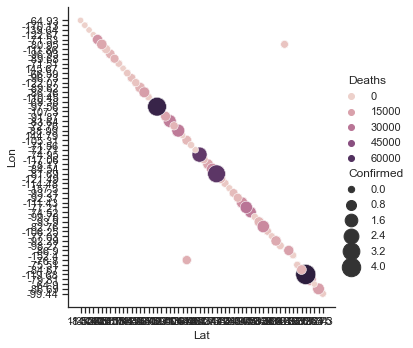

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
sns.relplot(data=covid, x="Lat", y="Lon", hue="Deaths", size="Confirmed", sizes=(40,400))

In [233]:
covid['Lat'][0]

'18.35'

In [234]:
covid['Lat']=covid['Lat'].astype('float16')
covid['Lon']=covid['Lon'].astype('float16')

In [235]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6061 entries, 0 to 6060
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           6061 non-null   object 
 1   Country      6061 non-null   object 
 2   CountryCode  6061 non-null   object 
 3   Province     6061 non-null   object 
 4   City         6061 non-null   object 
 5   CityCode     6061 non-null   object 
 6   Lat          6061 non-null   float16
 7   Lon          6061 non-null   float16
 8   Confirmed    6061 non-null   int64  
 9   Deaths       6061 non-null   int64  
 10  Recovered    6061 non-null   int64  
 11  Active       6061 non-null   int64  
 12  Date         6061 non-null   object 
dtypes: float16(2), int64(4), object(7)
memory usage: 544.7+ KB


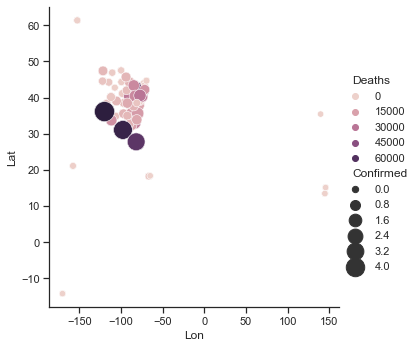

In [236]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.set_theme(style="ticks")
fig=sns.relplot(data=covid, x="Lon", y="Lat", hue="Deaths", size="Confirmed", sizes=(40,400))

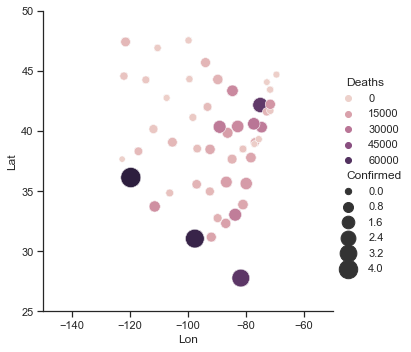

In [237]:
fig=sns.relplot(data=covid, x="Lon", y="Lat", hue="Deaths", size="Confirmed", sizes=(40,400)).set(ylim=(25, 50), xlim=(-150, -50))

In [238]:
req=requests.get("https://www.communitybenefitinsight.org/api/get_hospitals.php").json()
hospitals=pd.DataFrame(req)
hospitals.head()

,hospital_id,hospital_org_id,ein,name,name2,name3,street_address,city,state,zip_code,...,fips_state_and_county_code,hospital_bed_count,chrch_affl_f,urban_location_f,children_hospital_f,memb_counc_teach_hosps_f,medicare_provider_number,county,hospital_bed_size,updated_dt
0,1,1,630307951,Mizell Memorial Hospital,,Mizell Memorial Hospital,702 Main Street,Opp,AL,36462,...,01039,99,N,N,N,N,010007,Covington County,<100 beds,"October 1, 2021"
1,2,2,630578923,St Vincents East,,St Vincents East,50 Medical Park Drive East,Birmingham,AL,35235,...,01073,362,N,Y,N,Y,010011,Jefferson County,>299 beds,"October 1, 2021"
2,3,3,630312913,Shelby Baptist Medical Center,,Shelby Baptist Medical Center,1000 First Street North,Alabaster,AL,35007,...,01117,252,N,Y,N,N,010016,Shelby County,100-299 beds,"October 1, 2021"
3,4,4,630459034,Callahan Eye Foundation Hosp,,Callahan Eye Foundation Hosp,1720 University Boulevard,Birmingham,AL,35233,...,01073,106,N,Y,N,Y,010018,Jefferson County,100-299 beds,"October 1, 2021"
4,5,5,581973570,Cherokee Medical Center,,Cherokee Medical Center,100 Northwood Drive,Centre,AL,35960,...,01019,60,N,N,N,N,010022,Cherokee County,<100 beds,"October 1, 2021"


In [239]:
hospitals['state_county']=hospitals['state']+'_'+hospitals['county']
hospitals.head()

,hospital_id,hospital_org_id,ein,name,name2,name3,street_address,city,state,zip_code,...,hospital_bed_count,chrch_affl_f,urban_location_f,children_hospital_f,memb_counc_teach_hosps_f,medicare_provider_number,county,hospital_bed_size,updated_dt,state_county
0,1,1,630307951,Mizell Memorial Hospital,,Mizell Memorial Hospital,702 Main Street,Opp,AL,36462,...,99,N,N,N,N,010007,Covington County,<100 beds,"October 1, 2021",AL_Covington County
1,2,2,630578923,St Vincents East,,St Vincents East,50 Medical Park Drive East,Birmingham,AL,35235,...,362,N,Y,N,Y,010011,Jefferson County,>299 beds,"October 1, 2021",AL_Jefferson County
2,3,3,630312913,Shelby Baptist Medical Center,,Shelby Baptist Medical Center,1000 First Street North,Alabaster,AL,35007,...,252,N,Y,N,N,010016,Shelby County,100-299 beds,"October 1, 2021",AL_Shelby County
3,4,4,630459034,Callahan Eye Foundation Hosp,,Callahan Eye Foundation Hosp,1720 University Boulevard,Birmingham,AL,35233,...,106,N,Y,N,Y,010018,Jefferson County,100-299 beds,"October 1, 2021",AL_Jefferson County
4,5,5,581973570,Cherokee Medical Center,,Cherokee Medical Center,100 Northwood Drive,Centre,AL,35960,...,60,N,N,N,N,010022,Cherokee County,<100 beds,"October 1, 2021",AL_Cherokee County


In [240]:
HospitalInfoPerCounty=hospitals.groupby(['state_county'], as_index=False)['hospital_bed_count'].agg('sum')
HospitalInfoPerCounty.head()

,state_county,hospital_bed_count
0,AK_Anchorage Municipality,401
1,AK_Fairbanks North Star Borough,162
2,AK_Kenai Peninsula Borough,49622
3,AK_Ketchikan Gateway Borough,25
4,AK_Kodiak Island Borough,25


In [241]:
HospitalInfoPerCounty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710 entries, 0 to 1709
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   state_county        1710 non-null   object
 1   hospital_bed_count  1710 non-null   object
dtypes: object(2)
memory usage: 40.1+ KB


In [242]:
hospitals['hospital_bed_count']=hospitals['hospital_bed_count'].astype('float16')

In [243]:
HospitalInfoPerCounty=hospitals.groupby(['state_county'], as_index=False)['hospital_bed_count'].agg('sum')
HospitalInfoPerCounty.head()

,state_county,hospital_bed_count
0,AK_Anchorage Municipality,401.0
1,AK_Fairbanks North Star Borough,162.0
2,AK_Kenai Peninsula Borough,77.0
3,AK_Ketchikan Gateway Borough,25.0
4,AK_Kodiak Island Borough,25.0


In [244]:
HospitalInfoPerCounty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710 entries, 0 to 1709
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state_county        1710 non-null   object 
 1   hospital_bed_count  1710 non-null   float16
dtypes: float16(1), object(1)
memory usage: 30.1+ KB


In [245]:
HospitalInfoPerCounty['state_county']=HospitalInfoPerCounty['state_county'].str.replace(' County','')
HospitalInfoPerCounty.head(5)

,state_county,hospital_bed_count
0,AK_Anchorage Municipality,401.0
1,AK_Fairbanks North Star Borough,162.0
2,AK_Kenai Peninsula Borough,77.0
3,AK_Ketchikan Gateway Borough,25.0
4,AK_Kodiak Island Borough,25.0


In [246]:
#import requests
#import pandas as pd
#import json
#import numpy as np
req=requests.get("https://webhooks.mongodb-stitch.com/api/client/v2.0/app/covid-19-qppza/service/REST-API/incoming_webhook/us_only?min_date=2021-01-15T00:00:00.000Z&max_date=2021-01-15T00:00:00.000Z").json()
covid=pd.DataFrame(req)

In [247]:
covid.head()

,_id,uid,country_iso2,country_iso3,country_code,fips,county,state,country,combined_name,population,loc,date,confirmed,deaths,confirmed_daily,deaths_daily
0,6166376082b1870026b9adfc,84001001,US,USA,840,1001.0,Autauga,Alabama,US,"Autauga, Alabama, US",55869.0,"{'type': 'Point', 'coordinates': [-86.6441, 32...",2021-01-15T00:00:00.000Z,5103,55,28,0
1,6166376082b1870026b9b071,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,"Baldwin, Alabama, US",223234.0,"{'type': 'Point', 'coordinates': [-87.7221, 30...",2021-01-15T00:00:00.000Z,16002,179,161,2
2,6166376082b1870026b9b2e6,84001005,US,USA,840,1005.0,Barbour,Alabama,US,"Barbour, Alabama, US",24686.0,"{'type': 'Point', 'coordinates': [-85.3871, 31...",2021-01-15T00:00:00.000Z,1712,36,16,0
3,6166376082b1870026b9b55b,84001007,US,USA,840,1007.0,Bibb,Alabama,US,"Bibb, Alabama, US",22394.0,"{'type': 'Point', 'coordinates': [-87.1251, 32...",2021-01-15T00:00:00.000Z,2130,47,17,0
4,6166376082b1870026b9b7d0,84001009,US,USA,840,1009.0,Blount,Alabama,US,"Blount, Alabama, US",57826.0,"{'type': 'Point', 'coordinates': [-86.5679, 33...",2021-01-15T00:00:00.000Z,5264,83,45,3


In [248]:
type(covid['state'][0])

str

In [249]:
pd.Series(covid['state']).unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [250]:
us_state_to_abbrev = {
"Alabama": "AL","Alaska": "AK","Arizona": "AZ","Arkansas": "AR", "California": "CA",
"Colorado": "CO","Connecticut": "CT","Delaware": "DE","Florida": "FL","Georgia": "GA",
"Hawaii": "HI","Idaho": "ID","Illinois": "IL","Indiana": "IN","Iowa": "IA","Kansas": "KS",
"Kentucky": "KY","Louisiana": "LA","Maine": "ME","Maryland": "MD","Massachusetts": "MA",
"Michigan": "MI","Minnesota": "MN","Mississippi": "MS","Missouri": "MO","Montana": "MT",
"Nebraska": "NE","Nevada": "NV","New Hampshire": "NH","New Jersey": "NJ","New Mexico": "NM",
"New York": "NY","North Carolina": "NC","North Dakota": "ND","Ohio": "OH",
"Oklahoma": "OK","Oregon": "OR","Pennsylvania": "PA","Rhode Island": "RI",
"South Carolina": "SC","South Dakota": "SD","Tennessee": "TN","Texas": "TX",
"Utah": "UT","Vermont": "VT","Virginia": "VA","Washington": "WA",
"West Virginia": "WV","Wisconsin": "WI","Wyoming": "WY",
"District of Columbia": "DC","American Samoa": "AS","Guam": "GU", "Northern Mariana Islands": "MP",
"Puerto Rico": "PR","United States Minor Outlying Islands": "UM","U.S. Virgin Islands": "VI",
}
covid['state'].replace(us_state_to_abbrev, inplace=True)
covid.head(5)
pd.Series(covid['state']).unique()

array(['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE',
       'Diamond Princess', 'DC', 'FL', 'GA', 'Grand Princess', 'GU', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'MP', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'Virgin Islands', 'VA', 'WA', 'WV', 'WI', 'WY'],
      dtype=object)

In [251]:
covid['state']=covid['state'].str.replace('Diamond Princess','DP') # it is not a state, but a cruise. However, I use DP for this HW and no state names that 
covid['state']=covid['state'].str.replace('Grand Princess','GP') # it is not a state. However, I use GP for this HW and no state names that 
covid['state']=covid['state'].str.replace('Virgin Islands','VI')
covid.head(5)

,_id,uid,country_iso2,country_iso3,country_code,fips,county,state,country,combined_name,population,loc,date,confirmed,deaths,confirmed_daily,deaths_daily
0,6166376082b1870026b9adfc,84001001,US,USA,840,1001.0,Autauga,AL,US,"Autauga, Alabama, US",55869.0,"{'type': 'Point', 'coordinates': [-86.6441, 32...",2021-01-15T00:00:00.000Z,5103,55,28,0
1,6166376082b1870026b9b071,84001003,US,USA,840,1003.0,Baldwin,AL,US,"Baldwin, Alabama, US",223234.0,"{'type': 'Point', 'coordinates': [-87.7221, 30...",2021-01-15T00:00:00.000Z,16002,179,161,2
2,6166376082b1870026b9b2e6,84001005,US,USA,840,1005.0,Barbour,AL,US,"Barbour, Alabama, US",24686.0,"{'type': 'Point', 'coordinates': [-85.3871, 31...",2021-01-15T00:00:00.000Z,1712,36,16,0
3,6166376082b1870026b9b55b,84001007,US,USA,840,1007.0,Bibb,AL,US,"Bibb, Alabama, US",22394.0,"{'type': 'Point', 'coordinates': [-87.1251, 32...",2021-01-15T00:00:00.000Z,2130,47,17,0
4,6166376082b1870026b9b7d0,84001009,US,USA,840,1009.0,Blount,AL,US,"Blount, Alabama, US",57826.0,"{'type': 'Point', 'coordinates': [-86.5679, 33...",2021-01-15T00:00:00.000Z,5264,83,45,3


In [252]:
pd.Series(covid['state']).unique()

array(['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DP', 'DC',
       'FL', 'GA', 'GP', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY',
       'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV',
       'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PA',
       'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA',
       'WV', 'WI', 'WY'], dtype=object)

In [253]:
covid['state_county']=covid['state']+'_'+covid['county']
covid.head()

,_id,uid,country_iso2,country_iso3,country_code,fips,county,state,country,combined_name,population,loc,date,confirmed,deaths,confirmed_daily,deaths_daily,state_county
0,6166376082b1870026b9adfc,84001001,US,USA,840,1001.0,Autauga,AL,US,"Autauga, Alabama, US",55869.0,"{'type': 'Point', 'coordinates': [-86.6441, 32...",2021-01-15T00:00:00.000Z,5103,55,28,0,AL_Autauga
1,6166376082b1870026b9b071,84001003,US,USA,840,1003.0,Baldwin,AL,US,"Baldwin, Alabama, US",223234.0,"{'type': 'Point', 'coordinates': [-87.7221, 30...",2021-01-15T00:00:00.000Z,16002,179,161,2,AL_Baldwin
2,6166376082b1870026b9b2e6,84001005,US,USA,840,1005.0,Barbour,AL,US,"Barbour, Alabama, US",24686.0,"{'type': 'Point', 'coordinates': [-85.3871, 31...",2021-01-15T00:00:00.000Z,1712,36,16,0,AL_Barbour
3,6166376082b1870026b9b55b,84001007,US,USA,840,1007.0,Bibb,AL,US,"Bibb, Alabama, US",22394.0,"{'type': 'Point', 'coordinates': [-87.1251, 32...",2021-01-15T00:00:00.000Z,2130,47,17,0,AL_Bibb
4,6166376082b1870026b9b7d0,84001009,US,USA,840,1009.0,Blount,AL,US,"Blount, Alabama, US",57826.0,"{'type': 'Point', 'coordinates': [-86.5679, 33...",2021-01-15T00:00:00.000Z,5264,83,45,3,AL_Blount


In [254]:
CovidPerCounty=covid.groupby(['state_county'], as_index=False).agg({'deaths':'sum','confirmed':'sum','population':'sum','confirmed_daily':'mean','deaths_daily':'mean'})
CovidPerCounty.head(15)

,state_county,deaths,confirmed,population,confirmed_daily,deaths_daily
0,AK_Aleutians East,0,40,3337.0,1,0
1,AK_Aleutians West,0,242,5634.0,3,0
2,AK_Anchorage,129,24530,288000.0,92,0
3,AK_Bethel,12,2911,18386.0,26,0
4,AK_Bristol Bay,0,0,836.0,0,0
5,AK_Bristol Bay plus Lake and Peninsula,0,163,2428.0,1,0
6,AK_Chugach,3,241,6751.0,0,0
7,AK_Copper River,0,175,2699.0,1,0
8,AK_Denali,0,63,2097.0,0,0
9,AK_Dillingham,1,150,4916.0,1,0


In [255]:
CovidPerCounty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3336 entries, 0 to 3335
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state_county     3336 non-null   object 
 1   deaths           3336 non-null   int64  
 2   confirmed        3336 non-null   int64  
 3   population       3336 non-null   float64
 4   confirmed_daily  3336 non-null   int64  
 5   deaths_daily     3336 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 182.4+ KB


In [256]:
CovidPerCounty['mortality']=CovidPerCounty['deaths']/CovidPerCounty['confirmed']
CovidPerCounty.head(5)

,state_county,deaths,confirmed,population,confirmed_daily,deaths_daily,mortality
0,AK_Aleutians East,0,40,3337.0,1,0,0.000000
1,AK_Aleutians West,0,242,5634.0,3,0,0.000000
2,AK_Anchorage,129,24530,288000.0,92,0,0.005259
3,AK_Bethel,12,2911,18386.0,26,0,0.004122
4,AK_Bristol Bay,0,0,836.0,0,0,NaN


In [257]:
Hospital_Covid_PerCounty=pd.merge(HospitalInfoPerCounty,CovidPerCounty,on='state_county')
Hospital_Covid_PerCounty=Hospital_Covid_PerCounty[Hospital_Covid_PerCounty['population']>50000]
Hospital_Covid_PerCounty=Hospital_Covid_PerCounty[Hospital_Covid_PerCounty['population']<300000]
Hospital_Covid_PerCounty=Hospital_Covid_PerCounty[Hospital_Covid_PerCounty['confirmed']>10]
Hospital_Covid_PerCounty.head()

,state_county,hospital_bed_count,deaths,confirmed,population,confirmed_daily,deaths_daily,mortality
0,AL_Baldwin,232.0,179,16002,223234.0,161,2,0.011186
1,AL_Blount,65.0,83,5264,57826.0,45,3,0.015767
2,AL_Calhoun,552.0,200,10982,113605.0,119,3,0.018212
8,AL_Cullman,115.0,104,7960,83768.0,38,10,0.013065
9,AL_Elmore,69.0,101,7723,81209.0,53,0,0.013078


In [258]:
Hospital_Covid_PerCounty['people_per_bed']=Hospital_Covid_PerCounty['population']/Hospital_Covid_PerCounty['hospital_bed_count']
Hospital_Covid_PerCounty.head()

,state_county,hospital_bed_count,deaths,confirmed,population,confirmed_daily,deaths_daily,mortality,people_per_bed
0,AL_Baldwin,232.0,179,16002,223234.0,161,2,0.011186,962.215517
1,AL_Blount,65.0,83,5264,57826.0,45,3,0.015767,889.630769
2,AL_Calhoun,552.0,200,10982,113605.0,119,3,0.018212,205.806159
8,AL_Cullman,115.0,104,7960,83768.0,38,10,0.013065,728.417391
9,AL_Elmore,69.0,101,7723,81209.0,53,0,0.013078,1176.942029


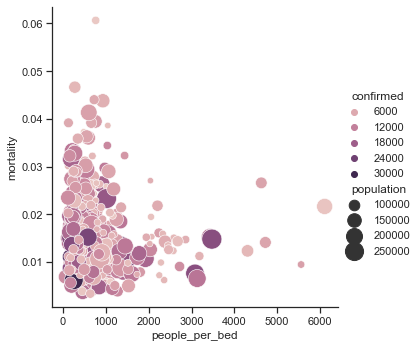

In [259]:
sns.relplot(data=Hospital_Covid_PerCounty, x="people_per_bed", y="mortality", hue="confirmed", size="population", sizes=(40,400))